In [1]:
#  Generate the barcode distribution plot
import pandas as pd
import numpy as np

GL_gDNA_cDNA_input = pd.read_csv('R_metadata_input_name.csv', sep=',')

# Create a heatmap for D0 - D5 differntiation data
D0_D5_diff_heatmap = GL_gDNA_cDNA_input[['cDNA/gDNA ratio_D0_1_diff', 'cDNA/gDNA ratio.1_D0_2_diff', 'cDNA/gDNA ratio.2_D0_3_diff', 
'cDNA/gDNA ratio.3_D0_4_diff', 'cDNA/gDNA ratio.4_D2_1_diff', 'cDNA/gDNA ratio.5_D2_2_diff', 
'cDNA/gDNA ratio.6_D2_3_diff', 'cDNA/gDNA ratio.7_D2_4_diff', 'cDNA/gDNA ratio.8_D5_1_diff', 
'cDNA/gDNA ratio.9_D5_2_diff', 'cDNA/gDNA ratio.10_D5_3_diff', 'cDNA/gDNA ratio.11_D5_4_diff',
'_Segment number']].copy()

# Rearrange the replicates by giving a group label
merged_D0_D5 = D0_D5_diff_heatmap.melt(id_vars = ['_Segment number'])
merged_D0_D5['group'] = "NA"
merged_D0_D5['group'] = np.where((merged_D0_D5['variable'] == 'cDNA/gDNA ratio_D0_1_diff') | 
                                 (merged_D0_D5['variable'] =='cDNA/gDNA ratio.1_D0_2_diff') | 
                                 (merged_D0_D5['variable'] =='cDNA/gDNA ratio.2_D0_3_diff') |
                                 (merged_D0_D5['variable'] =='cDNA/gDNA ratio.3_D0_4_diff'),
                                 'D0', merged_D0_D5['group'])
merged_D0_D5['group'] = np.where((merged_D0_D5['variable'] == 'cDNA/gDNA ratio.4_D2_1_diff') | 
                                 (merged_D0_D5['variable'] =='cDNA/gDNA ratio.5_D2_2_diff') | 
                                 (merged_D0_D5['variable'] =='cDNA/gDNA ratio.6_D2_3_diff') |
                                 (merged_D0_D5['variable'] =='cDNA/gDNA ratio.7_D2_4_diff'),
                                 'D2', merged_D0_D5['group'])
merged_D0_D5['group'] = np.where((merged_D0_D5['variable'] == 'cDNA/gDNA ratio.8_D5_1_diff') | 
                                 (merged_D0_D5['variable'] =='cDNA/gDNA ratio.9_D5_2_diff') | 
                                 (merged_D0_D5['variable'] =='cDNA/gDNA ratio.10_D5_3_diff') |
                                 (merged_D0_D5['variable'] =='cDNA/gDNA ratio.11_D5_4_diff'),
                                 'D5', merged_D0_D5['group'])

In [2]:
# find the smallest non-zero value
m = min(i for i in merged_D0_D5['value'] if i > 0)
print(m)

#add 1/100 of the smallest value to all the values (<1% of the minimal expressed BC)
merged_D0_D5['value'] = merged_D0_D5['value'] + 0.00001

0.002192934


In [3]:
D0_data = merged_D0_D5.loc[merged_D0_D5['group'] == 'D0']
D2_data = merged_D0_D5.loc[merged_D0_D5['group'] == 'D2']
D5_data = merged_D0_D5.loc[merged_D0_D5['group'] == 'D5']

# Calculate the interquantile range for D0, D2 and D5 data
D0_filter = D0_data.loc[(D0_data['value'] > 1e-05)]
D2_filter = D2_data.loc[(D2_data['value'] > 1e-05)]
D5_filter = D5_data.loc[(D5_data['value'] > 1e-05)]
                        
def iqr(data):
    q10, q90 = np.percentile(data, [10,90])
    return q90/q10

print(iqr(D0_filter['value']))
print(iqr(D2_filter['value']))
print(iqr(D5_filter['value']))

636.9421557687813
573.0530448221489
530.7373007668574


In [4]:
# calculat how many barcode expression is zero
print(D0_data.shape)
print(D2_data.shape)
print(D5_data.shape)
print(D0_filter.shape)
print(D2_filter.shape)
print(D5_filter.shape)


(11692, 4)
(11692, 4)
(11692, 4)
(6138, 4)
(6001, 4)
(5853, 4)


(0.0, 12500.0)

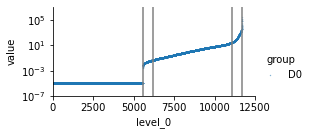

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

D0_sorted = D0_data.sort_values('value')
D0_sorted_reset = D0_sorted.reset_index().reset_index()

D2_sorted = D2_data.sort_values('value')
D2_sorted_reset = D2_sorted.reset_index().reset_index()

D5_sorted = D5_data.sort_values('value')
D5_sorted_reset = D5_sorted.reset_index().reset_index()

plot = sns.lmplot(x='level_0', y='value',data=D0_sorted_reset, hue='group',fit_reg=False,height=2, aspect=2,scatter_kws={"s": 0.1})
axes = plot.axes
plot.set(yscale="log")
plt.axvline(5555,color='grey')
plt.axvline(6168,color='grey')
plt.axvline(11078,color='grey')
plt.axvline(11692,color='grey')
axes[0,0].set_ylim(0.0000001,10000000)
axes[0,0].set_xlim(0,12500)


(0.0, 12500.0)

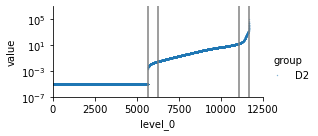

In [7]:
plot = sns.lmplot(x='level_0', y='value',data=D2_sorted_reset, hue='group',fit_reg=False,height=2, aspect=2,scatter_kws={"s": 0.1})
axes = plot.axes
plot.set(yscale="log")
plt.axvline(5692,color='grey')
plt.axvline(6292,color='grey')
plt.axvline(11092,color='grey')
plt.axvline(11692,color='grey')
axes[0,0].set_ylim(0.0000001,10000000)
axes[0,0].set_xlim(0,12500)

(0.0, 12500.0)

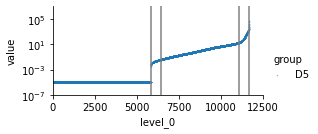

In [8]:
plot = sns.lmplot(x='level_0', y='value',data=D5_sorted_reset, hue='group',fit_reg=False,height=2, aspect=2,scatter_kws={"s": 0.1})
axes = plot.axes
plot.set(yscale="log")
plt.axvline(5840,color='grey')
plt.axvline(6425,color='grey')
plt.axvline(11107,color='grey')
plt.axvline(11692,color='grey')
axes[0,0].set_ylim(0.0000001,10000000)
axes[0,0].set_xlim(0,12500)

[(1e-07, 100000000)]

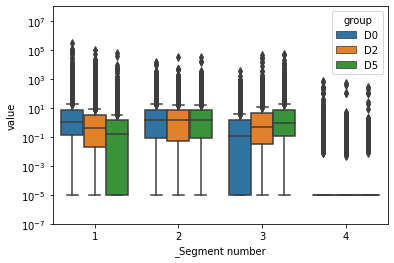

In [9]:
ax_violin = sns.boxplot(x="_Segment number", y="value", hue="group",
               data=merged_D0_D5)
ax_violin.set_yscale('log')
ax_violin.set(ylim=(0.0000001, 100000000))